<h2>1. Preprocess dataset</h2>

Set up your dataset structure like this:

It's important to name your dataset folder "DatasetXXX" where the last 3 digits are unique 


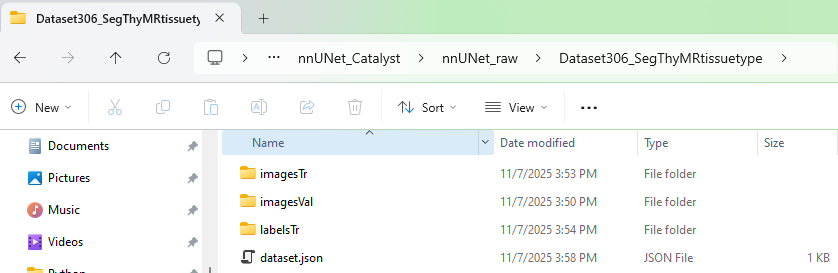

your dataset.json should look like this (update with your specifics)

In [2]:
{
    "labels": {
        "background": 0,
        "thyroid": 1,
        "IJV": 2,
        "CCA": 3,
        "fibrous_tissue": 4,
        "fatty_tissue": 5
    },
    "channel_names": {
        "0": "MRI"
    },
    "numTraining": 17,
    "file_ending": ".nii.gz"
}

{'labels': {'background': 0,
  'thyroid': 1,
  'IJV': 2,
  'CCA': 3,
  'fibrous_tissue': 4,
  'fatty_tissue': 5},
 'channel_names': {'0': 'MRI'},
 'numTraining': 17,
 'file_ending': '.nii.gz'}

Apply a tranform (exported from Slicer) to your dataset

In [ ]:
import os, sys, shutil
from pathlib import Path
import numpy as np
import nibabel as nib
import SimpleITK as sitk
import re

def flip_sitk(img: sitk.Image, flip_xyz=(False, False, False)) -> sitk.Image:
    return sitk.Flip(img, flip_xyz)

def list_cases(images_dir: Path):
    case_re = re.compile(r"^(?P<cid>.+)_(?P<ch>\d{4})\.nii\.gz$", re.IGNORECASE)
    cases = {}
    for f in images_dir.glob("*.nii.gz"):
        m = case_re.match(f.name)
        if not m:
            continue
        cid = m.group("cid")
        ch = int(m.group("ch"))
        cases.setdefault(cid, set()).add(ch)
    return cases


In [ ]:
!nnUNetv2_plan_and_preprocess --help

usage: nnUNetv2_plan_and_preprocess [-h] [-d D [D ...]] [-fpe FPE]
                                    [-npfp NPFP] [--verify_dataset_integrity]
                                    [--no_pp] [--clean] [-pl PL]
                                    [-gpu_memory_target GPU_MEMORY_TARGET]
                                    [-preprocessor_name PREPROCESSOR_NAME]
                                    [-overwrite_target_spacing OVERWRITE_TARGET_SPACING [OVERWRITE_TARGET_SPACING ...]]
                                    [-overwrite_plans_name OVERWRITE_PLANS_NAME]
                                    [-c C [C ...]] [-np NP [NP ...]]
                                    [--verbose]

options:
  -h, --help            show this help message and exit
  -d D [D ...]          [REQUIRED] List of dataset IDs. Example: 2 4 5. This
                        will run fingerprint extraction, experiment planning
                        and preprocessing for these datasets. Can of course
                        al

In [ ]:
!nnUNetv2_plan_and_preprocess -d 306 -npfp 5 --verify_dataset_integrity --clean -pl nnUNetPlannerResEncM --verbose

Fingerprint extraction...
Dataset304_SegThyUS
Using <class 'nnunetv2.imageio.simpleitk_reader_writer.SimpleITKIO'> as reader/writer

####################
verify_dataset_integrity Done. 
If you didn't see any error messages then your dataset is most likely OK!
####################

Using <class 'nnunetv2.imageio.simpleitk_reader_writer.SimpleITKIO'> as reader/writer
Experiment planning...
Attempting to find 3d_lowres config. 
Current spacing: [0.1236 0.1236 0.1236]. 
Current patch size: (np.int64(128), np.int64(128), np.int64(128)). 
Current median shape: [456.31067961 429.12621359 491.26213592]
Attempting to find 3d_lowres config. 
Current spacing: [0.127308 0.127308 0.127308]. 
Current patch size: (np.int64(128), np.int64(128), np.int64(128)). 
Current median shape: [443.02007729 416.62739184 476.95353002]
Attempting to find 3d_lowres config. 
Current spacing: [0.13112724 0.13112724 0.13112724]. 
Current patch size: (np.int64(128), np.int64(128), np.int64(128)). 
Current median shape:

<h2>2. Run training</h2>

In [10]:
!nnUNetv2_train --help

usage: nnUNetv2_train [-h] [-tr TR] [-p P]
                      [-pretrained_weights PRETRAINED_WEIGHTS]
                      [-num_gpus NUM_GPUS] [--npz] [--c] [--val] [--val_best]
                      [--disable_checkpointing] [-device DEVICE]
                      dataset_name_or_id configuration fold

positional arguments:
  dataset_name_or_id    Dataset name or ID to train with
  configuration         Configuration that should be trained
  fold                  Fold of the 5-fold cross-validation. Should be an int
                        between 0 and 4.

options:
  -h, --help            show this help message and exit
  -tr TR                [OPTIONAL] Use this flag to specify a custom trainer.
                        Default: nnUNetTrainer
  -p P                  [OPTIONAL] Use this flag to specify a custom plans
                        identifier. Default: nnUNetPlans
  -pretrained_weights PRETRAINED_WEIGHTS
                        [OPTIONAL] path to nnU-Net checkpoint file 

Variations: can use 2D config here as well

In [ ]:
!nnUNetv2_train 304 3d_fullres 0 -p nnUNetResEncUNetMPlans

usage: nnUNetv2_train [-h] [-tr TR] [-p P]
                      [-pretrained_weights PRETRAINED_WEIGHTS]
                      [-num_gpus NUM_GPUS] [--npz] [--c] [--val] [--val_best]
                      [--disable_checkpointing] [-device DEVICE]
                      dataset_name_or_id configuration fold
nnUNetv2_train: error: the following arguments are required: dataset_name_or_id, configuration, fold


3. Run Inference

In [ ]:
!nnUNetv2_predict -h


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################



usage: nnUNetv2_predict [-h] -i I -o O -d D [-p P] [-tr TR] -c C
                        [-f F [F ...]] [-step_size STEP_SIZE] [--disable_tta]
                        [--verbose] [--save_probabilities]
                        [--continue_prediction] [-chk CHK] [-npp NPP]
                        [-nps NPS]
                        [-prev_stage_predictions PREV_STAGE_PREDICTIONS]
                        [-num_parts NUM_PARTS] [-part_id PART_ID]
                        [-device DEVICE] [--disable_progress_bar]
nnUNetv2_predict: error: argument -h/--help: ignored explicit argument 'elp'


In [ ]:
!nnUNetv2_predict -i "C:\Python\nnUNet_Catalyst\nnUNet_raw\Dataset306_SegThyMRtissuetype\imagesVal" -o "D:\Catalyst\SegThyMRItissuetype_predictions" -d 306 -c 3d_fullres -f 0 -p nnUNetResEncUNetMPlans -chk checkpoint_best.pth

In [ ]:
!nnUNetv2_predict -i "D:\Catalyst\JasonAu_dataset\nifti" -o "D:\Catalyst\JasonAu_dataset\nifti" -d 304 -c 3d_fullres -f 0 -p nnUNetResEncUNetMPlans -chk checkpoint_best.pth

305 (synthetic dataset) not trained on resenc plans

In [ ]:
!nnUNetv2_predict -i "D:\Catalyst\JasonAu_dataset\nifti\305" -o "D:\Catalyst\JasonAu_dataset\nifti\305" -d 305 -c 3d_fullres -f 0 -chk checkpoint_best.pth